100
100
100


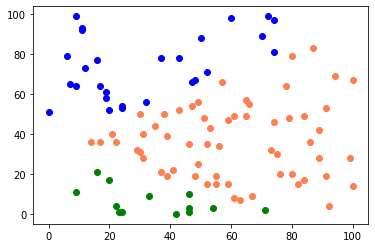

100
100
100


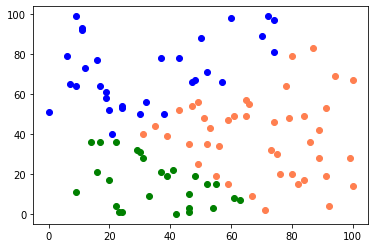

100
100
100


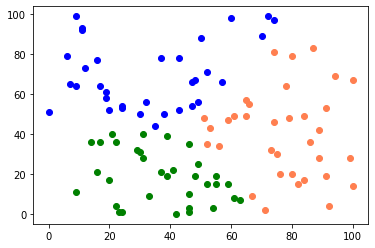

100
100
100


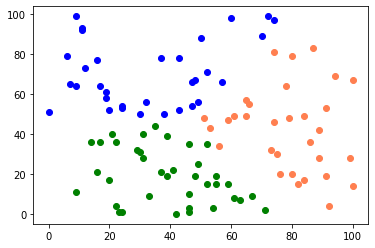

100
100
100


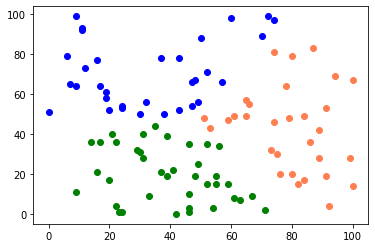

100
100
100


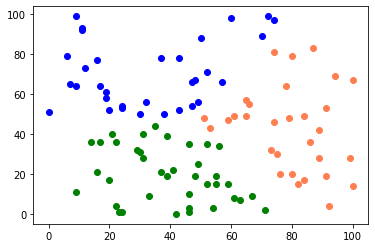

100
100
100


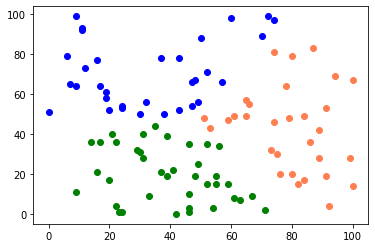

100
100
100


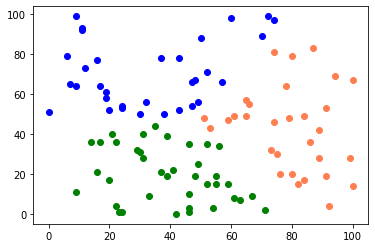

100
100
100


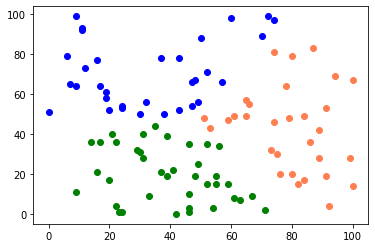

100
100
100


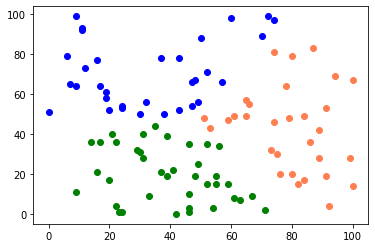

In [27]:
# K means cluster for two dimensional space

import random
import math
import matplotlib.pyplot as plot

k = 3
iterations = 10
n = 100
highest_range = 100 #range of the data space

def create_data(highest,n):
    x,y =[],[]
    for i in range(n):
        x.append(random.randint(0,highest))
        y.append(random.randint(0,highest))
    return x,y

def splot(data_x,data_y,assigments):
    print(len(data_x))
    print(len(data_y))
    print(len(assignments))
    for i in range(len(assigments)):
        if assignments[i] == 0:
            plot.scatter(data_x[i],data_y[i],c='coral')
        elif assignments[i] == 1:
            plot.scatter(data_x[i],data_y[i],c='blue')
        elif assignments[i] == 2:
            plot.scatter(data_x[i],data_y[i],c='green')
    plot.show()


data_x,data_y = create_data(highest_range,n)
k_points_x, k_points_y = create_data(highest_range,n)
assignments = []
# plot.scatter(data_x, data_y)
assignments = [] #each index correspond to a dp, each value of index correspond to that dp's assigned cluster
for i in range(iterations):
    for dp in range(n):
        closest = 10000
        smallest_distance = 1000
        for centroid_i in range(k):
            distance = math.sqrt(sum([(data_x[dp]-k_points_x[centroid_i])**2,(data_y[dp]-k_points_y[centroid_i])**2]))
            if distance < smallest_distance:
                closest = centroid_i
                smallest_distance = distance
        if i == 0:#first iteration when no values initiated
            assignments.append(closest)
        else:
            assignments[dp] = closest
    splot(data_x,data_y,assignments)# plot its closest centroids in this iteration
    #recalculation starts
    for centroid_i in range(k):
        x_total = 0
        y_total = 0
        counter = 0
        for dp in range(n):
            if assignments[dp] == centroid_i:
                x_total += data_x[dp]
                y_total += data_y[dp]
                counter +=1
        k_points_x[centroid_i] = x_total/counter
        k_points_y[centroid_i] = y_total/counter
        
        


In [ ]:
def k_means(data, k, number_of_iterations):
    n = len(data)
    number_of_features = data.shape[1]
    # Pick random indices for the initial centroids.
    initial_indices = np.random.choice(range(n), k)
    # We keep the centroids as |features| x k matrix.
    means = data[initial_indices].T
    # To avoid loops, we repeat the data k times depthwise and compute the
    # distance from each point to each centroid in one step in a
    # n x |features| x k tensor.
    repeated_data = np.stack([data] * k, axis=-1)
    all_rows = np.arange(n)
    zero = np.zeros([1, 1, 2])
    for _ in range(number_of_iterations):
        # Broadcast means across the repeated data matrix, gives us a
        # n x k matrix of distances.
        distances = np.sum(np.square(repeated_data - means), axis=1)
        # Find the index of the smallest distance (closest cluster) for each
        # point.
        assignment = np.argmin(distances, axis=-1)
        # Again to avoid a loop, we'll create a sparse matrix with k slots for
        # each point and fill exactly the one slot that the point was assigned
        # to. Then we reduce across all points to give us the sum of points for
        # each cluster.
        sparse = np.zeros([n, k, number_of_features])
        sparse[all_rows, assignment] = data
        # To compute the correct mean, we need to know how many points are
        # assigned to each cluster (without a loop).
        counts = (sparse != zero).sum(axis=0)
        # Compute new assignments.
        means = sparse.sum(axis=0).T / counts.clip(min=1).T
    return means.T
